<a href="https://colab.research.google.com/github/JankowskaJ/Trip-prices-model/blob/main/Trip_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The project aims to create a model that will predict the price of a last-minute trip for two people. The model will be created based on data scraped from the websites of travel agencies ITAKA and Rainbow on July 13, 2025. The information obtained from these sites includes: destination, star rating - hotel rating, rating - average rating of trip, offer type (all inclusive, half board, etc.), price, date. The models that were trained in the project are: LinearRegression, RandomForestRegressor, XGBRegressor.

In [1]:
pip install requests beautifulsoup4 pandas apscheduler

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 4.1 MB/s eta 0:00:00


In [2]:
# import libraries

import re
import requests
from bs4 import BeautifulSoup, Comment
import pandas as pd
import numpy as np
from datetime import datetime
from apscheduler.schedulers.blocking import BlockingScheduler

In [3]:
# Scrape the ITAKA website - the first 110 pages with last-minute offers. Offers for two people.

def scrape_itaka():
    itaka_url = "https://www.itaka.pl/last-minute/?participants%5B0%5D%5Badults%5D=2&page="
    data = []

    for page in range(1, 111):
        print(f"Scraping page {page}...")
        url = itaka_url + str(page)
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Failed to retrieve page {page}, status code: {response.status_code}")
            continue

        soup = BeautifulSoup(response.content, "html.parser")

        # Find all offer containers
        offers = soup.find_all("div", class_="styles_c__f1i9i d-flex styles_c--enlarged-size__AJvYG")
        if not offers:
            print(f"No offers found on page {page} — maybe pagination ended early.")
            break

        for offer in offers:
            try:
                destination = offer.find("div", class_="styles_destination__tOoSF text-truncate").get_text(strip=True)
                star_rating = len(offer.find_all("i", class_="icon icon-shape-star"))
                rating_tag = offer.find("strong")
                rating = rating_tag.get_text(strip=True) if rating_tag else "N/A"
                offer_type = offer.select_one('span.c__children-omp84x div[class=""]').text.strip()
                price = offer.find("span", class_="current-price__value-Hy1Ehq").get_text(strip=True)
                date = offer.find("div", class_="styles_c__GqLxf").get_text(strip=True)

                data.append({
                    "source": "ITAKA",
                    "destination": destination,
                    "star rating": star_rating,
                    "rating": rating,
                    "offer type": offer_type,
                    "price": price,
                    "date": date
                })
            except Exception as e:
                print(f"Error parsing an offer on page {page}: {e}")
    return data

In [4]:
# Scrape the Rainbow website - the first 110 pages with last-minute offers. Offers for two people.

def scrape_rainbow():
    rainbow_url = "https://r.pl/last-minute?typTransportu=AIR&data&dorosli=1995-01-01&dorosli=1995-01-01&dzieci=nie&liczbaPokoi=1&dowolnaLiczbaPokoi=nie&dataWylotu&dlugoscPobytu=*-*&dlugoscPobytu.od=&dlugoscPobytu.do=&cena=avg&cena.od=&cena.do=&ocenaKlientow=*-*&promocja=last-minute&hotelUrl&produktUrl&sortowanie=termin-asc&strona="
    data = []

    for page in range(1, 111):
        print(f"Scraping page {page}...")
        url = rainbow_url + str(page)
        response = requests.get(url)

        if response.status_code != 200:
            print(f"Failed to retrieve page {page}, status code: {response.status_code}")
            continue

        soup = BeautifulSoup(response.content, "html.parser")

        # Find all offer containers
        offers = soup.find_all("a", class_="n-bloczek szukaj-bloczki__element")
        if not offers:
            print(f"No offers found on page {page} — maybe pagination ended early.")
            break

        for offer in offers:
            try:
              destination = offer.find("span", class_="r-typography r-typography--secondary r-typography--normal r-typography--black r-typography__caption r-typography--one-line-ellipsis r-typography--break-word r-bloczek-lokalizacja r-bloczek__body-lokalizacja").get_text(strip=True)
              star_rating_div = offer.find("div", class_="r-gwiazdki")
              star_rating = star_rating_div.get("data-rating") if star_rating_div else "Not available"
              rating = offer.find("div", class_="r-bloczek__chips").get_text(strip=True)
              offer_type = offer.find("span", class_="r-typography r-typography--secondary r-typography--normal r-typography--black r-typography__caption r-typography--break-word r-bloczek-wyzywienie__nazwa").get_text(strip=True)
              price = offer.find("span", class_="r-typography r-typography--main r-typography--bold r-typography--primary r-typography__h1 r-typography--break-word r-bloczek-cena__aktualna").get_text(strip=True)
              date = offer.find("div", class_="r-bloczek-wlasciwosci__dni").get_text(strip=True)

              # Append to data
              data.append({
                  "source": "Rainbow",
                  "destination": destination,
                  "star rating": star_rating,
                  "rating": rating,
                  "offer type": offer_type,
                  "price": price,
                  "date": date
              })
            except Exception as e:
                print(f"Error parsing an offer on page {page}: {e}")
    return data

In [5]:
# Union the data from ITAKA and Rainbow and create a one dataset.

def scrape_all():
    all_data = []
    all_data.extend(scrape_itaka())
    all_data.extend(scrape_rainbow())

    df = pd.DataFrame(all_data)
    df.to_csv("travel_offers.csv", mode='a', index=False, header=not pd.io.common.file_exists("travel_offers.csv"))
    print(f"Scraped data at {datetime.now()}")

In [6]:
scrape_all()

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [7]:
# Load the saved dataset

df = pd.read_csv('travel_offers.csv', on_bad_lines='skip')

In [8]:
df

,source,destination,star rating,rating,offer type,price,date
0,ITAKA,"Turcja,Kemer",5,3.8,17.07 - 21.07.2025 (5 dni)Kraków 18:10All incl...,2 299 zł,17.07-21.07.2025(5 dni)
1,ITAKA,"Bułgaria,Złote Piaski",4,4.7,29.07 - 1.08.2025 (4 dni)Warszawa-Okęcie 06:05...,2 199 zł,29.07-1.08.2025(4 dni)
2,ITAKA,Uzbekistan,0,5.0,13.08 - 23.08.2025 (11 dni)Warszawa-Okęcie 16:...,7 589 zł,13.08-23.08.2025(11 dni)
3,ITAKA,"Turcja,Finike",5,4.5,17.07 - 21.07.2025 (5 dni)Kraków 18:10All incl...,2 299 zł,17.07-21.07.2025(5 dni)
4,ITAKA,"Albania,Durres",5,5.0,31.07 - 3.08.2025 (4 dni)Kraków 13:10All inclu...,2 699 zł,31.07-3.08.2025(4 dni)
...,...,...,...,...,...,...,...
4173,Rainbow,Wypoczynek•Portugalia: Madera,5,5.3/6(3 oceny),Śniadania,11 429zł/os.,23.08.2025 (8 dni / 7 noclegów)inne terminy
4174,Rainbow,Objazd•Stany Zjednoczone i Bahamy,Not available,NaN,3 posiłki,15 947zł/os.,23.08.2025 (9 dni / 7 noclegów)inne terminy
4175,Rainbow,Objazd + wypoczynek•Mauritius,Not available,5.3/6(117 ocen),2 posiłki,18 289zł/os.,23.08.2025 (17 dni / 14 noclegów)inne terminy
4176,Rainbow,Objazd + wypoczynek•Mauritius,Not available,5.4/6(107 ocen),2 posiłki,18 918zł/os.,23.08.2025 (17 dni / 14 noclegów)inne terminy


In [9]:
# Clear the column "destination_cleaned" by removing unnecessary content

df['destination_cleaned'] = [re.sub(f'Wypoczynek•', '', str) for str in df['destination']]
df['destination_cleaned'] = [re.sub(f'Objazd•', '', str) for str in df['destination_cleaned']]
df['destination_cleaned'] = df['destination_cleaned'].str.replace('Objazd + wypoczynek•', '', regex=False)

In [10]:
# Clear the column "price" by removing currency

df['price'] = [re.sub('[zł,zł/os.]', '', str) for str in df['price']]

In [11]:
# Clear the column "rating" by removing unnecessary content

df.loc[df['source'] == 'ITAKA', 'rating'] = df.loc[df['source'] == 'ITAKA', 'rating'].apply(
    lambda x: float(re.sub(r'.*<strong>\s*([\d.]+)\s*</strong>.*', r'\1', str(x)))
)
df.loc[df['source'] == 'Rainbow', 'rating'] = df.loc[df['source'] == 'Rainbow', 'rating'].apply(
    lambda x: float(re.sub(r'^([\d.]+).*', r'\1', str(x).strip()))
)

In [12]:
# Calculate trip length from column "date"

df.loc[df['source'] == 'ITAKA', 'trip length'] = df.loc[df['source'] == 'ITAKA', 'date'].apply(
    lambda x: re.search(r'(\d+)\s*dni', str(x)).group(1) if re.search(r'(\d+)\s*dni', str(x)) else str(x)
    )
df.loc[df['source'] == 'Rainbow', 'trip length'] = df.loc[df['source'] == 'Rainbow', 'date'].apply(
    lambda x: re.search(r'\b(\d+) dni\b', str(x)).group(1) if re.search(r'\b(\d+) dni\b', str(x)) else str(x)
    )

In [13]:
import datetime

# Extract day when trip will start to calculate days to departure

def extract_start_date(row):
    if row['source'] == 'ITAKA':
        try:
            match = re.search(r'(\d{1,2}\.\d{1,2})-(\d{1,2}\.\d{1,2}\.\d{4})', row['date'])
            if match:
                day_month = match.group(1)
                year = match.group(2).split('.')[-1]
                return f"{day_month}.{year}"
        except:
            return None
    elif row['source'] == 'Rainbow':
        return row['date'].split(' ')[0]
    else:
        return None

# Apply extraction
df['start_date_str'] = df.apply(extract_start_date, axis=1)

df['start_of_trip'] = pd.to_datetime(df['start_date_str'], format='%d.%m.%Y', errors='coerce')
today = datetime.datetime.now().date()

# Calculate days to departure
df['days to departure'] = (df['start_of_trip'] - pd.to_datetime(today)).dt.days
print(df[['source', 'date', 'start_date_str', 'start_of_trip', 'days to departure']])

       source                                           date start_date_str  \
0       ITAKA                        17.07-21.07.2025(5 dni)     17.07.2025   
1       ITAKA                         29.07-1.08.2025(4 dni)     29.07.2025   
2       ITAKA                       13.08-23.08.2025(11 dni)     13.08.2025   
3       ITAKA                        17.07-21.07.2025(5 dni)     17.07.2025   
4       ITAKA                         31.07-3.08.2025(4 dni)     31.07.2025   
...       ...                                            ...            ...   
4173  Rainbow    23.08.2025 (8 dni / 7 noclegów)inne terminy     23.08.2025   
4174  Rainbow    23.08.2025 (9 dni / 7 noclegów)inne terminy     23.08.2025   
4175  Rainbow  23.08.2025 (17 dni / 14 noclegów)inne terminy     23.08.2025   
4176  Rainbow  23.08.2025 (17 dni / 14 noclegów)inne terminy     23.08.2025   
4177  Rainbow  23.08.2025 (17 dni / 14 noclegów)inne terminy     23.08.2025   

     start_of_trip  days to departure  
0       202

In [14]:
# Split column 'destination_cleaned' for 'country' and 'city'
df['country'] = df['destination_cleaned'].apply(
    lambda x: re.search(r'^([^,:]+)[,:]', str(x)).group(1) if re.search(r'^([^,:]+)[,:]', str(x)) else str(x)
    )
df['city'] = df['destination_cleaned'].apply(
    lambda x: re.search(r'^([^,:]+)[,:]([^,:]+)', str(x)).group(2) if re.search(r'^([^,:]+)[,:]([^,:]+)', str(x)) else str(x)
    )

In [15]:
# Drop columns that will not be used to train models

df.drop(['destination', 'date', 'start_date_str', 'start_of_trip', 'destination_cleaned'], axis='columns', inplace=True)

In [16]:
# Clear column 'offer type' by removing unnecessary text

df.loc[df['source'] == 'ITAKA', 'offer type'] = df.loc[df['source'] == 'ITAKA', 'offer type'].apply(
    lambda x: re.sub(r'^.*?\d{2}:\d{2}\s*(.*)$', r'\1', str(x)))

In [17]:
df

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5,3.8,All inclusive ultra 24h,2 299,5,4,Turcja,Kemer
1,ITAKA,4,4.7,All inclusive ultra,2 199,4,16,Bułgaria,Złote Piaski
2,ITAKA,0,5.0,3 posiłki,7 589,11,31,Uzbekistan,Uzbekistan
3,ITAKA,5,4.5,All inclusive,2 299,5,4,Turcja,Finike
4,ITAKA,5,5.0,All inclusive,2 699,4,18,Albania,Durres
...,...,...,...,...,...,...,...,...,...
4173,Rainbow,5,5.3,Śniadania,11 429,8,41,Portugalia,Madera
4174,Rainbow,Not available,NaN,3 posiłki,15 947,9,41,Stany Zjednoczone i Bahamy,Stany Zjednoczone i Bahamy
4175,Rainbow,Not available,5.3,2 posiłki,18 289,17,41,Mauritius,Mauritius
4176,Rainbow,Not available,5.4,2 posiłki,18 918,17,41,Mauritius,Mauritius


In [18]:
# Check unique values in the column 'offer type'

offer_type_count = df['offer type'].value_counts()
print("Offer types:\n", offer_type_count)

Offer types:
 offer type
Śniadania                                                                  1474
All inclusive                                                              1338
2 posiłki                                                                   654
Bez wyżywienia                                                              367
Wyżywienie zgodnie z programem                                               91
3 posiłki                                                                    52
All inclusive ultra 24h                                                      36
Half board plus                                                              30
All inclusive 24h                                                            27
All inclusive ultra                                                          24
Full board plus                                                              23
Ultra all inclusive                                                          18
Wg programu imp

In [19]:
# Reduce the number of unique values in a column 'offer type' by unifying similar values

def clean_offer_type(offer):
    if 'all inclusive' in offer.lower():
        return 'All inclusive'
    elif 'program' in offer.lower():
        return 'Wyżywienie zgodnie z programem'
    elif 'half board' in offer.lower():
        return 'Half board'
    elif 'full board' in offer.lower():
        return 'Full board'
    else:
        return offer

df['offer type'] = df['offer type'].apply(clean_offer_type)

In [20]:
offer_type_count = df['offer type'].value_counts()
print("Offer types:\n", offer_type_count)

Offer types:
 offer type
Śniadania                         1474
All inclusive                     1465
2 posiłki                          654
Bez wyżywienia                     367
Wyżywienie zgodnie z programem     110
3 posiłki                           52
Half board                          33
Full board                          23
Name: count, dtype: int64


In [21]:
df = df.replace(['Not available', "N\A"], np.nan)

/tmp/ipython-input-21-3252299891.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(['Not available', "N\A"], np.nan)


In [22]:
df

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5,3.8,All inclusive,2 299,5,4,Turcja,Kemer
1,ITAKA,4,4.7,All inclusive,2 199,4,16,Bułgaria,Złote Piaski
2,ITAKA,0,5.0,3 posiłki,7 589,11,31,Uzbekistan,Uzbekistan
3,ITAKA,5,4.5,All inclusive,2 299,5,4,Turcja,Finike
4,ITAKA,5,5.0,All inclusive,2 699,4,18,Albania,Durres
...,...,...,...,...,...,...,...,...,...
4173,Rainbow,5,5.3,Śniadania,11 429,8,41,Portugalia,Madera
4174,Rainbow,NaN,NaN,3 posiłki,15 947,9,41,Stany Zjednoczone i Bahamy,Stany Zjednoczone i Bahamy
4175,Rainbow,NaN,5.3,2 posiłki,18 289,17,41,Mauritius,Mauritius
4176,Rainbow,NaN,5.4,2 posiłki,18 918,17,41,Mauritius,Mauritius


In [23]:
# Change columns 'star rating', 'rating', 'price' for number format

df['star rating'] = df['star rating'].map(lambda x: float(x))
df['rating'] = df['rating'].map(lambda x: float(x))
df["price"] = df['price'].str.replace(' ', '').astype(float)

In [24]:
df.describe()

,star rating,rating,price,days to departure
count,3962.000000,2532.000000,4178.000000,4178.000000
mean,3.908758,5.140521,5429.375539,14.946146
std,1.176193,0.488364,3783.452720,11.984018
min,0.000000,2.500000,978.000000,1.000000
25%,4.000000,4.900000,3213.000000,7.000000
50%,4.000000,5.200000,4399.000000,12.000000
75%,5.000000,5.500000,6558.500000,18.000000
max,5.000000,6.000000,124841.000000,102.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178 entries, 0 to 4177
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             4178 non-null   object 
 1   star rating        3962 non-null   float64
 2   rating             2532 non-null   float64
 3   offer type         4178 non-null   object 
 4   price              4178 non-null   float64
 5   trip length        4178 non-null   object 
 6   days to departure  4178 non-null   int64  
 7   country            4178 non-null   object 
 8   city               4178 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 293.9+ KB


In [26]:
# Number of offers by country
df["country"].value_counts(dropna=False)

,count
country,
Hiszpania,626
Grecja,470
Włochy,422
Turcja,380
Egipt,229
...,...
Peru,1
Islandia i Dania,1
Kuba,1


In [27]:
# Preliminary analysis
{
    "Number of downloaded offers": df.shape[0],
    "Number of unique countries": df["country"].nunique(),
    "Number of unique cities": df["city"].nunique(),
    "Average hotel rating": df["star rating"].mean(),
    "Average offer rating": df["rating"].mean(),
    "Average price": df["price"].mean(),
    "Minimum price": df["price"].min(),
    "Maximum price": df["price"].max()
}

{'Number of downloaded offers': 4178,
 'Number of unique countries': 112,
 'Number of unique cities': 416,
 'Average hotel rating': np.float64(3.9087582029278143),
 'Average offer rating': np.float64(5.140521327014218),
 'Average price': np.float64(5429.375538535184),
 'Minimum price': 978.0,
 'Maximum price': 124841.0}

In [28]:
df_cleaned = df.dropna()

In [29]:
df_cleaned.describe()

,star rating,rating,price,days to departure
count,2325.000000,2325.000000,2325.000000,2325.000000
mean,3.832043,5.136989,4993.477849,15.258065
std,1.294627,0.498293,2809.434555,13.280749
min,0.000000,2.500000,978.000000,1.000000
25%,4.000000,4.900000,3201.000000,6.000000
50%,4.000000,5.200000,4199.000000,10.000000
75%,5.000000,5.500000,5787.000000,19.000000
max,5.000000,6.000000,36528.000000,84.000000


In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 4173
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             2325 non-null   object 
 1   star rating        2325 non-null   float64
 2   rating             2325 non-null   float64
 3   offer type         2325 non-null   object 
 4   price              2325 non-null   float64
 5   trip length        2325 non-null   object 
 6   days to departure  2325 non-null   int64  
 7   country            2325 non-null   object 
 8   city               2325 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 181.6+ KB


In [31]:
# Check counts of unique values in column 'city'

counts_city= df_cleaned["city"].value_counts()
counts_city

,count
city,
Riwiera Turecka,104
Majorka,68
Hurghada,52
Riwiera Egejska,40
Larnaka,36
...,...
Nyali,1
Kastelanska Riwiera,1
Neum,1


In [32]:
# Filtering rows - removing a city from a small number of offers - excluding more than 10

min_offers = 10
valid_destinations = counts_city[counts_city >= min_offers].index
df_cleaned = df_cleaned[df_cleaned['city'].isin(valid_destinations)]

In [33]:
df_cleaned["city"].value_counts()

,count
city,
Riwiera Turecka,104
Majorka,68
Hurghada,52
Riwiera Egejska,40
Larnaka,36
...,...
Lizbona,10
Barcelona,10
Costa Brava - Costa del Maresme,10


In [34]:
# Check counts of unique values in column 'country'

counts_country = df_cleaned["country"].value_counts()
counts_country

,count
country,
Grecja,311
Hiszpania,281
Turcja,274
Egipt,179
Włochy,158
Wyspy Kanaryjskie,89
Tunezja,75
Cypr,64
Bułgaria,48


In [35]:
df_cleaned

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5.0,3.8,All inclusive,2299.0,5,4,Turcja,Kemer
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
5,ITAKA,0.0,5.3,Śniadania,2799.0,5,43,Włochy,Włochy
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
...,...,...,...,...,...,...,...,...,...
4167,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta
4168,Rainbow,5.0,5.5,Śniadania,8830.0,9,41,Grecja,Santorini
4171,Rainbow,4.0,5.3,All inclusive,10247.0,10,41,Mauritius,Mauritius
4172,Rainbow,5.0,5.8,All inclusive,10958.0,8,41,Grecja,Korfu


In [36]:
# Checking the relationship between the price of the trip and the length of stay depending on the travel agency
import plotly.express as px

px.scatter(df_cleaned,
           x = "trip length",
           y = "price",
           color = "source")

In [37]:
# Analysis of the price of the trip according to the rating depending on the travel agency

px.box(df_cleaned,
       x = "rating",
       y = "price",
       color = "source",
       title = "The price of the trip compared to the rating by travel agency")

In [38]:
# Analysis of the trip price according to the hotel standard depending on the travel agency

px.box(df_cleaned,
       x = "star rating",
       y = "price",
       color = "source",
       title = "The price of the trip compared to the hotel standard, broken down by travel agency")

In [39]:
# Analysis of the tour price according to the remaining time until the start of the tour, depending on the travel agency

px.box(df_cleaned,
       x = "days to departure",
       y = "price",
       color = "source",
       title = "Price of the trip compared to the remaining time until the start of the trip, broken down by travel agency")

In [40]:
# Analysis of the price of the trip by type of trip depending on the travel agency
px.box(df_cleaned,
       x = "offer type",
       y = "price",
       color = "source",
       title = "Tour price compared to tour type, broken down by travel agency")

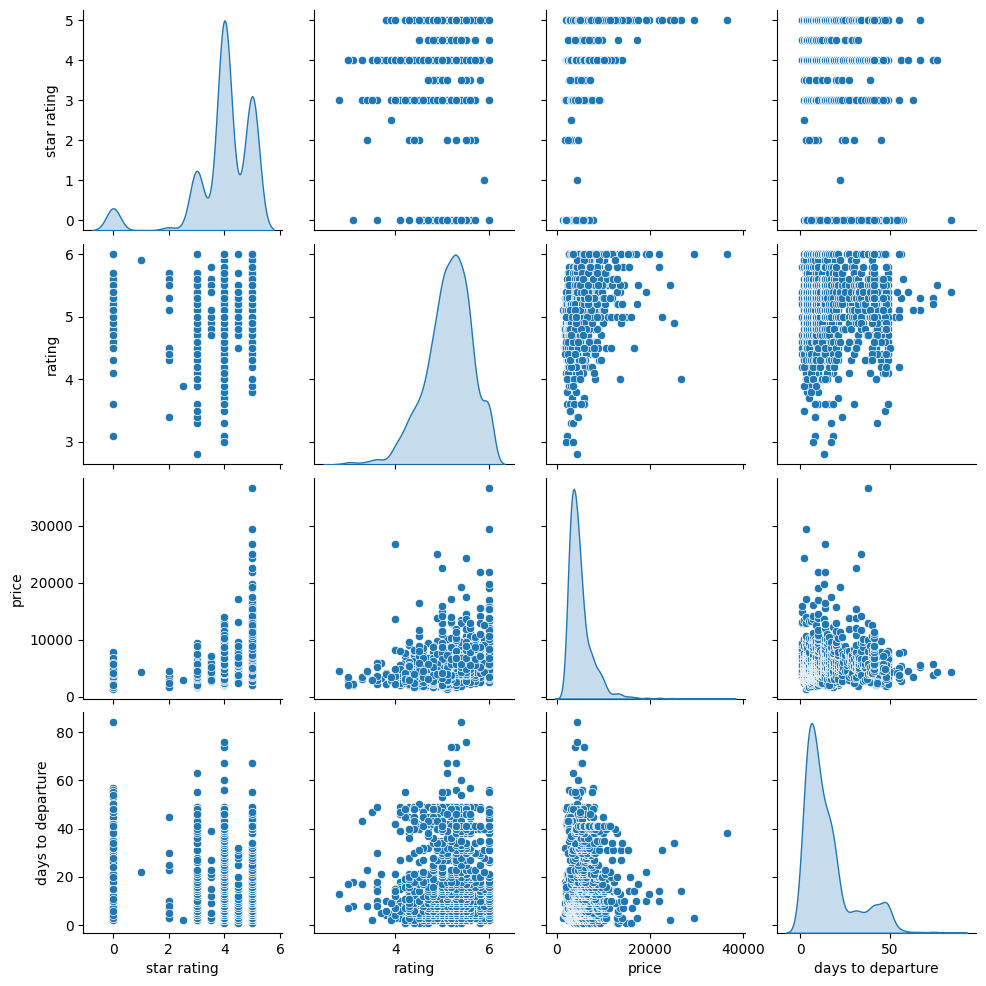

In [41]:
# Graph of relationships between features
import seaborn as sns

sns.pairplot(df_cleaned, diag_kind="kde");

In [42]:
# Outliers according to numerical features
px.box(df_cleaned, x = "price", title = "Feature spread - trips_price", orientation = "h")

In [43]:
# Outliers by numerical features
px.box(df_cleaned, x = "star rating", title = "Feature spread - hotel rating", orientation = "h")

In [44]:
# Outliers according to numerical features
px.box(df_cleaned, x = "rating", title = "Feature spread - trip evaluation", orientation = "h")

In [45]:
# Outliers according to numerical features
px.box(df_cleaned, x = "days to departure", title = "Feature spread - days to departure", orientation = "h")

In [46]:
# Calculate 1st and 3rd percentile for columns: 'price', 'rating', 'star rating' and 'days to departure'

def percentile(df, col):
	q1, q3 = np.percentile(df[col],[25,75])
	return q1, q3

print(f'The 1 and 3 percentile for price are:', (percentile(df_cleaned, "price")))
print(f'The 1 and 3 percentile for rating are:', (percentile(df_cleaned, "rating")))
print(f'The 1 and 3 percentile for star rating are:', (percentile(df_cleaned, "star rating")))
print(f'The 1 and 3 percentile for days to departure are:', (percentile(df_cleaned, "days to departure")))

The 1 and 3 percentile for price are: (np.float64(3300.0), np.float64(5748.25))
The 1 and 3 percentile for rating are: (np.float64(4.9), np.float64(5.5))
The 1 and 3 percentile for star rating are: (np.float64(4.0), np.float64(5.0))
The 1 and 3 percentile for days to departure are: (np.float64(6.0), np.float64(19.0))


In [47]:
# Determine outlier thersholds

def determine_outlier_thresholds_iqr(df, col, th1=0.25, th3=0.75):
    q1 = df[col].quantile(th1)
    q3 = df[col].quantile(th3)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    return lower_limit, upper_limit

lower_limit_price, upper_limit_price = determine_outlier_thresholds_iqr(df_cleaned, "price")
print(f'The outlier thresholds for price are:', (lower_limit_price, upper_limit_price))
lower_limit_rating, upper_limit_rating = determine_outlier_thresholds_iqr(df_cleaned, "rating")
print(f'The outlier thresholds for rating are:', (lower_limit_rating, upper_limit_rating))
lower_limit_star_rating, upper_limit_star_rating = determine_outlier_thresholds_iqr(df_cleaned, "star rating")
print(f'The outlier thresholds for star rating are:', (lower_limit_star_rating, upper_limit_star_rating))
lower_limit_days_to_departure, upper_limit_days_to_departure = determine_outlier_thresholds_iqr(df_cleaned, "days to departure")
print(f'The outlier thresholds for days to departure are:', (lower_limit_days_to_departure, upper_limit_days_to_departure))

The outlier thresholds for price are: (np.float64(-372.375), np.float64(9420.625))
The outlier thresholds for rating are: (np.float64(4.000000000000001), np.float64(6.3999999999999995))
The outlier thresholds for star rating are: (np.float64(2.5), np.float64(6.5))
The outlier thresholds for days to departure are: (np.float64(-13.5), np.float64(38.5))


In [48]:
# Print outliers for column "price"

def outliers(df, col, lower_limit, upper_limit):
  outlier = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
  return outlier

print(f'Outlier for price column are:\n', (outliers(df_cleaned, "price", lower_limit_price, upper_limit_price)))

Outlier for price column are:
        source  star rating  rating     offer type    price trip length  \
124     ITAKA          5.0     4.9      Śniadania   9839.0           8   
380     ITAKA          5.0     5.5  All inclusive   9559.0           8   
384     ITAKA          5.0     5.6  All inclusive  10879.0           8   
388     ITAKA          5.0     5.6  All inclusive  10209.0           8   
390     ITAKA          5.0     5.1  All inclusive  10039.0           8   
...       ...          ...     ...            ...      ...         ...   
4153  Rainbow          5.0     6.0  All inclusive  10577.0          12   
4154  Rainbow          5.0     5.9  All inclusive  12559.0           8   
4171  Rainbow          4.0     5.3  All inclusive  10247.0          10   
4172  Rainbow          5.0     5.8  All inclusive  10958.0           8   
4173  Rainbow          5.0     5.3      Śniadania  11429.0           8   

      days to departure     country              city  
124                  45 

In [49]:
# Print outliers for column "rating"

print(f'Outlier for rating column are:\n', (outliers(df_cleaned, "rating", lower_limit_rating, upper_limit_rating)))

Outlier for rating column are:
        source  star rating  rating                      offer type    price  \
0       ITAKA          5.0     3.8                   All inclusive   2299.0   
25      ITAKA          0.0     3.1  Wyżywienie zgodnie z programem   2149.0   
136     ITAKA          4.0     3.7                   All inclusive   5899.0   
208     ITAKA          3.0     3.9                   All inclusive   3449.0   
231     ITAKA          4.0     3.6                       Śniadania   2279.0   
281     ITAKA          4.0     3.7                   All inclusive   3299.0   
342     ITAKA          3.0     4.0                   All inclusive   2299.0   
471     ITAKA          4.0     4.0                   All inclusive   4549.0   
492     ITAKA          4.0     4.0                       Śniadania   3049.0   
496     ITAKA          4.0     4.0                       Śniadania   3349.0   
573     ITAKA          0.0     3.6                       Śniadania   3379.0   
750     ITAKA       

In [50]:
# Print outliers for column "star rating"

print(f'Outlier for star rating column are:\n', (outliers(df_cleaned, "star rating", lower_limit_star_rating, upper_limit_star_rating)))

Outlier for star rating column are:
        source  star rating  rating                      offer type   price  \
5       ITAKA          0.0     5.3                       Śniadania  2799.0   
24      ITAKA          0.0     4.3                       2 posiłki  2299.0   
25      ITAKA          0.0     3.1  Wyżywienie zgodnie z programem  2149.0   
35      ITAKA          0.0     5.5                       3 posiłki  6299.0   
36      ITAKA          0.0     5.2  Wyżywienie zgodnie z programem  4069.0   
...       ...          ...     ...                             ...     ...   
3070  Rainbow          2.0     4.4                  Bez wyżywienia  1757.0   
3895  Rainbow          1.0     5.9                  Bez wyżywienia  4343.0   
3913  Rainbow          2.0     3.4                   All inclusive  4595.0   
3936  Rainbow          2.0     5.5                       Śniadania  4535.0   
3991  Rainbow          2.0     4.4                  Bez wyżywienia  2429.0   

     trip length  days to 

In [51]:
# Print outliers for column "days to departure"
print(f'Outlier for days to departure column are:\n', (outliers(df_cleaned, "days to departure", lower_limit_days_to_departure, upper_limit_days_to_departure)))

Outlier for days to departure column are:
        source  star rating  rating     offer type    price trip length  \
5       ITAKA          0.0     5.3      Śniadania   2799.0           5   
11      ITAKA          4.0     4.3      2 posiłki   2999.0           8   
13      ITAKA          4.0     5.1  All inclusive   3399.0           8   
19      ITAKA          3.0     4.2  All inclusive   2899.0           8   
21      ITAKA          3.0     4.7  All inclusive   3699.0           8   
...       ...          ...     ...            ...      ...         ...   
4167  Rainbow          4.0     5.7  All inclusive   8685.0           8   
4168  Rainbow          5.0     5.5      Śniadania   8830.0           9   
4171  Rainbow          4.0     5.3  All inclusive  10247.0          10   
4172  Rainbow          5.0     5.8  All inclusive  10958.0           8   
4173  Rainbow          5.0     5.3      Śniadania  11429.0           8   

      days to departure     country        city  
5                 

In [52]:
# Create function for removing outliers

def remove_outliers(df, col, lower_limit, upper_limit):
  df_new = df[(df[col] > lower_limit) & (df[col] < upper_limit)]
  return df_new

In [53]:
# Remove outliers - column "price"

df_remove_1 = remove_outliers(df_cleaned, "price", lower_limit_price, upper_limit_price)
df_remove_1

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
0,ITAKA,5.0,3.8,All inclusive,2299.0,5,4,Turcja,Kemer
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
5,ITAKA,0.0,5.3,Śniadania,2799.0,5,43,Włochy,Włochy
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
...,...,...,...,...,...,...,...,...,...
4164,Rainbow,4.0,5.6,2 posiłki,7834.0,8,41,Grecja,Korfu
4165,Rainbow,5.0,6.0,All inclusive,8402.0,8,41,Grecja,Kos
4166,Rainbow,4.0,5.0,2 posiłki,8647.0,10,41,Mauritius,Mauritius
4167,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta


In [54]:
# Remove outliers - column "rating"

df_remove_2 = remove_outliers(df_remove_1, "rating", lower_limit_rating, upper_limit_rating)
df_remove_2

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
5,ITAKA,0.0,5.3,Śniadania,2799.0,5,43,Włochy,Włochy
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
8,ITAKA,4.0,5.2,Full board,2999.0,8,7,Włochy,Sycylia
...,...,...,...,...,...,...,...,...,...
4164,Rainbow,4.0,5.6,2 posiłki,7834.0,8,41,Grecja,Korfu
4165,Rainbow,5.0,6.0,All inclusive,8402.0,8,41,Grecja,Kos
4166,Rainbow,4.0,5.0,2 posiłki,8647.0,10,41,Mauritius,Mauritius
4167,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta


In [55]:
# Remove outliers - column "star rating"

df_remove_3 = remove_outliers(df_remove_2, "star rating", lower_limit_star_rating, upper_limit_star_rating)
df_remove_3

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
8,ITAKA,4.0,5.2,Full board,2999.0,8,7,Włochy,Sycylia
9,ITAKA,4.0,5.0,All inclusive,2699.0,8,2,Egipt,Marsa Alam
...,...,...,...,...,...,...,...,...,...
4164,Rainbow,4.0,5.6,2 posiłki,7834.0,8,41,Grecja,Korfu
4165,Rainbow,5.0,6.0,All inclusive,8402.0,8,41,Grecja,Kos
4166,Rainbow,4.0,5.0,2 posiłki,8647.0,10,41,Mauritius,Mauritius
4167,Rainbow,4.0,5.7,All inclusive,8685.0,8,41,Malta,Malta


In [56]:
# Remove outliers - column "days to departure"

df_final = remove_outliers(df_remove_3, "days to departure", lower_limit_days_to_departure, upper_limit_days_to_departure)
df_final

,source,star rating,rating,offer type,price,trip length,days to departure,country,city
1,ITAKA,4.0,4.7,All inclusive,2199.0,4,16,Bułgaria,Złote Piaski
4,ITAKA,5.0,5.0,All inclusive,2699.0,4,18,Albania,Durres
6,ITAKA,5.0,5.1,All inclusive,4799.0,8,14,Grecja,Zakynthos
8,ITAKA,4.0,5.2,Full board,2999.0,8,7,Włochy,Sycylia
9,ITAKA,4.0,5.0,All inclusive,2699.0,8,2,Egipt,Marsa Alam
...,...,...,...,...,...,...,...,...,...
4113,Rainbow,4.0,5.5,2 posiłki,3998.0,8,38,Grecja,Riwiera Olimpijska
4114,Rainbow,4.0,4.7,2 posiłki,5727.0,9,38,Grecja,Korfu
4115,Rainbow,3.0,5.3,Śniadania,5756.0,8,38,Grecja,Kreta - Chania
4116,Rainbow,4.0,6.0,All inclusive,5759.0,8,38,Turcja,Riwiera Turecka


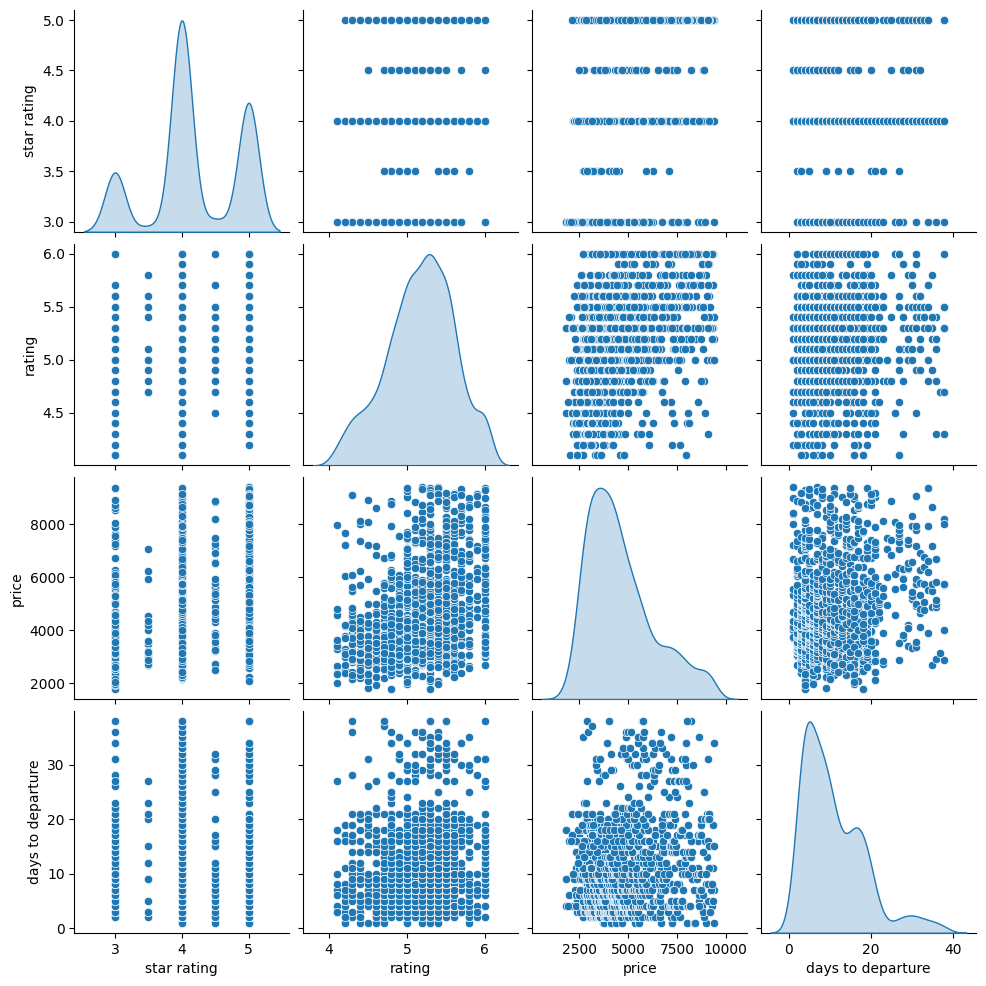

In [57]:
# Check relationships in a dataset (between columns in numeric format)

sns.pairplot(df_final, diag_kind="kde");

In [58]:
df_final['price'].describe()

,price
count,1404.000000
mean,4619.140313
std,1708.376836
min,1789.000000
25%,3334.500000
50%,4199.000000
75%,5502.250000
max,9399.000000


In [59]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 1 to 4117
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   source             1404 non-null   object 
 1   star rating        1404 non-null   float64
 2   rating             1404 non-null   float64
 3   offer type         1404 non-null   object 
 4   price              1404 non-null   float64
 5   trip length        1404 non-null   object 
 6   days to departure  1404 non-null   int64  
 7   country            1404 non-null   object 
 8   city               1404 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 109.7+ KB


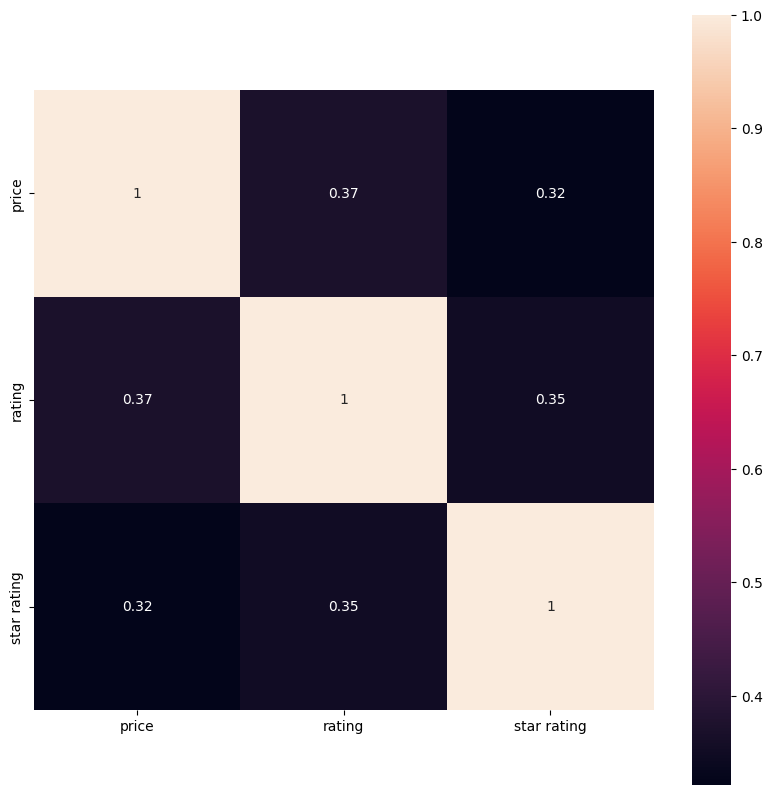

In [60]:
# Checking the correlation between variables

import matplotlib
import matplotlib.pyplot as plt

df_temp = df_final[["price", "rating", "star rating"]]
korelacja = df_temp.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(korelacja, square = True, annot = True);

In [61]:
# Final analysis

{
    "Number of downloaded offers": df_final.shape[0],
    "Number of unique countries": df_final["country"].nunique(),
    "Number of unique cities": df_final["city"].nunique(),
    "Average hotel rating": df_final["star rating"].mean(),
    "Average offer rating": df_final["rating"].mean(),
    "Average price": df_final["price"].mean(),
    "Minimum price": df_final["price"].min(),
    "Maximum price": df_final["price"].max()
}

{'Number of downloaded offers': 1404,
 'Number of unique countries': 24,
 'Number of unique cities': 86,
 'Average hotel rating': np.float64(4.1752136752136755),
 'Average offer rating': np.float64(5.170655270655271),
 'Average price': np.float64(4619.140313390313),
 'Minimum price': 1789.0,
 'Maximum price': 9399.0}

In [62]:
pip install feature-engine

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 6.1 MB/s eta 0:00:00


In [63]:
pip install --upgrade category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from feature_engine.encoding import MeanEncoder

df_final["trip length"] = pd.to_numeric(df_final["trip length"], errors="raise")

# Split dataset into train and test set

X = df_final.drop('price', axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipython-input-64-1378008958.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [65]:
print(X_train.head())

     source  star rating  rating     offer type  trip length  \
1334  ITAKA          4.0     4.7  All inclusive            8   
1945  ITAKA          5.0     5.3  All inclusive            6   
190   ITAKA          4.0     4.8      2 posiłki            8   
567   ITAKA          5.0     5.6  All inclusive            8   
1422  ITAKA          5.0     4.9  All inclusive            8   

      days to departure            country             city  
1334                  4  Wyspy Kanaryjskie         Teneryfa  
1945                  5             Turcja             Side  
190                   4               Cypr            Pafos  
567                  10           Malediwy         Malediwy  
1422                  5              Egipt  Sharm el Sheikh  


In [66]:
X_train

,source,star rating,rating,offer type,trip length,days to departure,country,city
1334,ITAKA,4.0,4.7,All inclusive,8,4,Wyspy Kanaryjskie,Teneryfa
1945,ITAKA,5.0,5.3,All inclusive,6,5,Turcja,Side
190,ITAKA,4.0,4.8,2 posiłki,8,4,Cypr,Pafos
567,ITAKA,5.0,5.6,All inclusive,8,10,Malediwy,Malediwy
1422,ITAKA,5.0,4.9,All inclusive,8,5,Egipt,Sharm el Sheikh
...,...,...,...,...,...,...,...,...
3398,Rainbow,5.0,5.4,All inclusive,8,9,Egipt,Sharm el Sheikh
3488,Rainbow,4.0,5.3,All inclusive,8,10,Hiszpania,Costa Brava
3825,Rainbow,5.0,5.1,All inclusive,9,20,Egipt,Marsa Alam
2999,Rainbow,5.0,5.6,All inclusive,8,4,Turcja,Riwiera Egejska


In [67]:
X_test

,source,star rating,rating,offer type,trip length,days to departure,country,city
3364,Rainbow,4.0,5.2,All inclusive,4,9,Bułgaria,Słoneczny Brzeg
2052,ITAKA,4.0,4.4,All inclusive,6,12,Turcja,Kemer
2550,ITAKA,3.0,4.3,Śniadania,8,6,Madera,Madera
2578,ITAKA,4.0,4.2,All inclusive,8,5,Turcja,Marmaris
3139,Rainbow,4.0,5.1,All inclusive,5,6,Turcja,Riwiera Turecka
...,...,...,...,...,...,...,...,...
3686,Rainbow,4.0,5.3,All inclusive,8,15,Hiszpania,Fuerteventura
719,ITAKA,4.0,4.6,All inclusive,8,7,Włochy,Sardynia
3772,Rainbow,5.0,5.6,All inclusive,8,17,Turcja,Riwiera Turecka
3629,Rainbow,4.0,5.8,Śniadania,8,14,Włochy,Sycylia


In [68]:
# Replace the categories in categorical features by the mean value of the target variable shown by each category

encoder = MeanEncoder(
    variables=["source", "country", "city", "offer type"],
    smoothing="auto",
    missing_values='ignore'
)

In [69]:
encoder.fit(X_train, y_train)

MeanEncoder(missing_values='ignore', smoothing='auto',
            variables=['source', 'country', 'city', 'offer type'])

In [70]:
encoder.encoder_dict_

{'source': {'ITAKA': 4060.3869482384875, 'Rainbow': 5235.492683183528},
 'country': {'Albania': 3201.5412139617088,
  'Bułgaria': 3776.410707942082,
  'Chorwacja': 3919.73457614492,
  'Cypr': 4192.651311298841,
  'Cypr i Cypr Północny': 6426.637634123165,
  'Czarnogóra': 5109.292644633744,
  'Dominikana': 9169.0,
  'Egipt': 4350.770851603734,
  'Grecja': 4628.81819812503,
  'Gruzja': 2699.0,
  'Hiszpania': 5032.979616460558,
  'Kenia': 6106.567270996696,
  'Madera': 4546.25209423443,
  'Malediwy': 7549.257276528223,
  'Malta': 2920.4148224477717,
  'Maroko': 5811.860504552848,
  'Mauritius': 8541.294725142901,
  'Portugalia': 5353.135801382585,
  'Tunezja': 4164.904003706936,
  'Turcja': 4595.469917530171,
  'Wyspy Kanaryjskie': 4573.951423097133,
  'Włochy': 4166.413097998835,
  'Zanzibar': 6871.544496709878,
  'Zjednoczone Emiraty Arabskie': 3617.450659111743},
 'city': {' Agadir': 5811.860504552848,
  ' Algarve': 6942.923517361599,
  ' Budva': 5109.292644633744,
  ' Chalkidiki': 445

In [71]:
# Apply encoder

train_t = encoder.transform(X_train)
test_t = encoder.transform(X_test)

print(train_t.head())

           source  star rating  rating   offer type  trip length  \
1334  4060.386948          4.0     4.7  4665.409149            8   
1945  4060.386948          5.0     5.3  4665.409149            6   
190   4060.386948          4.0     4.8  4997.104816            8   
567   4060.386948          5.0     5.6  4665.409149            8   
1422  4060.386948          5.0     4.9  4665.409149            8   

      days to departure      country         city  
1334                  4  4573.951423  4359.924385  
1945                  5  4595.469918  3536.349919  
190                   4  4192.651311  4334.551287  
567                  10  7549.257277  7549.257277  
1422                  5  4350.770852  3275.069387  


In [72]:
# Get a boolean DataFrame showing NaNs
nan_locations = test_t.isna()

# Get rows with any NaNs
rows_with_nans = test_t[nan_locations.any(axis=1)]

In [73]:
rows_with_nans

,source,star rating,rating,offer type,trip length,days to departure,country,city


In [74]:
# Find rows in test_t that do NOT have any NaNs
mask = test_t.notna().all(axis=1)

# Apply the mask to both test_t and y_test
test_t = test_t[mask]
y_test = y_test[mask]

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_t)
X_test_scaled = scaler.transform(test_t)

# Preparation of the Linear Regression model

model_rl = LinearRegression()
model_rl.fit(X_train_scaled, y_train)

LinearRegression()

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

price_y_pred = model_rl.predict(X_test_scaled)
# The coefficients
print("Coefficients: \n", model_rl.coef_)

# # The mean squared error
print("Mean squared error LinearRegression: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination LinearRegression: %.2f" % r2_score(y_test, price_y_pred))

Coefficients: 
 [-107.49353691  441.38653662  299.59629349   45.93699377  330.81105756
  283.42693271   38.65202844 1017.76783764]
Mean squared error LinearRegression: 1037354.60
Coefficient of determination LinearRegression: 0.62


In [77]:
import pickle

# Save the trained model as a pickle string
saved_LinearRegression = pickle.dumps(model_rl)

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Preparation of the RandomForestRegressor model

model_rfr = RandomForestRegressor()
model_rfr.fit(X_train_scaled, y_train)

price_y_pred = model_rfr.predict(X_test_scaled)

# # The mean squared error
print("Mean squared error RandomForestRegressor: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination RandomForestRegressor: %.2f" % r2_score(y_test, price_y_pred))

Mean squared error RandomForestRegressor: 927112.86
Coefficient of determination RandomForestRegressor: 0.66


In [79]:
# Save the trained model as a pickle string
saved_RandomForestRegressor = pickle.dumps(model_rfr)

Feature: source, Score: 0.00553
Feature: star rating, Score: 0.09984
Feature: rating, Score: 0.11353
Feature: offer type, Score: 0.02814
Feature: trip length, Score: 0.07444
Feature: days to departure, Score: 0.10885
Feature: country, Score: 0.04374
Feature: city, Score: 0.52593


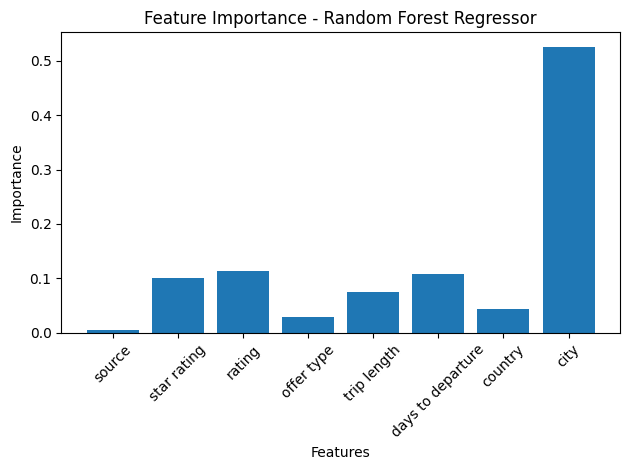

In [80]:
# Get importance
importance = model_rfr.feature_importances_

feature_names = ["source", "star rating", "rating", "offer type", "trip length", "days to departure", "country", "city"]

for i, v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

# Bar chart
plt.bar(range(len(importance)), importance)
plt.xticks(ticks=range(len(importance)), labels=feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest Regressor')
plt.tight_layout()
plt.show()

In [81]:
from xgboost import XGBRegressor

# Preparation of the XGBRegressor model
model_xgb = XGBRegressor()
model_xgb.fit(X_train_scaled, y_train)

price_y_pred = model_xgb.predict(X_test_scaled)

# # The mean squared error
print("Mean squared error XGBRegressor: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination XGBRegressor: %.2f" % r2_score(y_test, price_y_pred))

Mean squared error XGBRegressor: 987771.21
Coefficient of determination XGBRegressor: 0.64


In [82]:
# Save the trained model as a pickle string
saved_XGBRegressor = pickle.dumps(model_xgb)

Feature: source, Score: 0.03715
Feature: star rating, Score: 0.14636
Feature: rating, Score: 0.05110
Feature: offer type, Score: 0.05323
Feature: trip length, Score: 0.15033
Feature: days to departure, Score: 0.06768
Feature: country, Score: 0.06036
Feature: city, Score: 0.43379


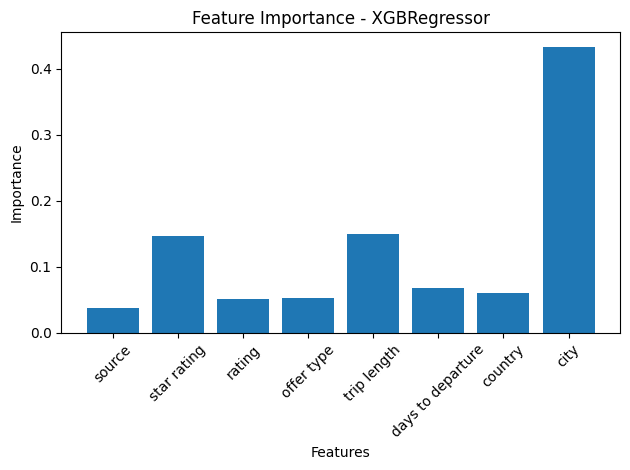

In [83]:
# get importance
importance_xgb = model_xgb.feature_importances_

feature_names = ["source", "star rating", "rating", "offer type", "trip length", "days to departure", "country", "city"]

for i, v in enumerate(importance_xgb):
    print('Feature: %s, Score: %.5f' % (feature_names[i], v))

# Bar chart
plt.bar(range(len(importance_xgb)), importance_xgb)
plt.xticks(ticks=range(len(importance_xgb)), labels=feature_names, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance - XGBRegressor')
plt.tight_layout()
plt.show()

In [84]:
from sklearn.model_selection import RandomizedSearchCV

# Use RandomizedSearchCV for optimizing the hyperparameters of a machine learning model
param_rand = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(RandomForestRegressor(),
                                   param_rand)
random_search.fit(X_train_scaled, y_train)
print(random_search.best_estimator_)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=4)


In [85]:
# Apply parameters from RandomizedSearchCV

model_rfr_rand = RandomForestRegressor(n_estimators=200,
                                       min_samples_split=3)
model_rfr_rand.fit(X_train_scaled, y_train)

price_y_pred = model_rfr_rand.predict(X_test_scaled)
# # The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, price_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, price_y_pred))

Mean squared error: 918293.23
Coefficient of determination: 0.66


In [86]:
# Drop column "source" which were less important - on feature importance graph

X_new = df_final.drop(['price', 'source'], axis=1)
y_new = df_final['price']
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

In [87]:
encoder_new = MeanEncoder(
    variables=["country", "city", "offer type"],
    smoothing="auto"
)

In [88]:
encoder_new.fit(X_train_new, y_train_new)
train_t_new = encoder_new.transform(X_train_new)
test_t_new = encoder_new.transform(X_test_new)

In [89]:
scaler_new = StandardScaler()
X_train_scaled_new = scaler_new.fit_transform(train_t_new)
X_test_scaled_new = scaler_new.transform(test_t_new)

In [90]:
# Define the new version of model

model_rfr_new = RandomForestRegressor()
model_rfr_new.fit(X_train_scaled_new, y_train_new)

price_y_pred_new = model_rfr_new.predict(X_test_scaled_new)

# The mean squared error
print("Mean squared error for RandomForestRegressor without two features: %.2f" % mean_squared_error(y_test_new, price_y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for RandomForestRegressor without two features : %.2f" % r2_score(y_test_new, price_y_pred_new))

Mean squared error for RandomForestRegressor without two features: 907339.41
Coefficient of determination for RandomForestRegressor without two features : 0.67


In [91]:
# Save the trained model as a pickle string
saved_RandomForestRegressor_new = pickle.dumps(model_rfr_new)

In [92]:
# Define the new version of model

model_xgb_new = XGBRegressor()
model_xgb_new.fit(X_train_scaled_new, y_train_new)

price_y_pred_new = model_xgb_new.predict(X_test_scaled_new)

# The mean squared error
print("Mean squared error for XGBRegressor without two features: %.2f" % mean_squared_error(y_test_new, price_y_pred_new))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination for XGBRegressor without two features: %.2f" % r2_score(y_test_new, price_y_pred_new))

Mean squared error for XGBRegressor without two features: 972861.56
Coefficient of determination for XGBRegressor without two features: 0.64


In [93]:
# Save the trained model as a pickle string
saved_XGBRegressor_new = pickle.dumps(model_xgb_new)